In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train=pd.read_csv('../data/reclamacoes.csv', sep=';')

In [2]:
train.head(4) #primeiros 4 registros

,manifestacao_clean,TEMA,SUBTEMA
0,Olá em 26/06 comprei o localizador 8RK87X para...,Alteração pela empresa aérea,"Alternativas (reacomodação, reembolso integral..."
1,"Prezados, Abri o processo junto a LATAM pra te...",Transporte de bagagem,Extravio
2,"No dia 17/12 comprei uma passagem, Vitória x C...",Alteração pelo passageiro,Remarcação e resilição
3,Estou tendo um problema! Recentemente fiz a co...,Programas de Fidelidade,Programas de Fidelidade


In [3]:
train.shape #numero de registros do dataset

(39071, 3)

In [4]:
train.columns.values #colunas do dataset

array(['manifestacao_clean', 'TEMA', 'SUBTEMA'], dtype=object)

In [5]:
train["manifestacao_clean"][0] #amostra do dataset

'Olá em 26/06 comprei o localizador 8RK87X para 04 passageiros Sinop x Brasilia, indo 25/02 e retornando em 28/02. Comprei bem antecipado para poder me programar na viagem (principalmente no retorno); no entanto houve uma alteração no horário o que descontrolou todos meus planos (principalmente no retorno). Entrei em contato com a central via fone e facebook; só me foi ofertada uma opção de voo, no entanto este não me atende; solicitado a alteração do destino da viagem sem custo. Pedido à Empresa Alteração no destino da viagem sem custo.'

In [6]:
train['TEMA'].unique()#tipos diferentes de labels 

array(['Alteração pela empresa aérea', 'Transporte de bagagem',
       'Alteração pelo passageiro', 'Programas de Fidelidade',
       'Oferta e compra',
       'Reclamações contra valores e regras do contrato',
       'Execução do voo', 'Check-in e embarque', 'Reembolso', 'Outros',
       'Assistência ao PNAE'], dtype=object)

In [7]:
train['SUBTEMA'].unique()#tipos diferentes de labels 

array(['Alternativas (reacomodação, reembolso integral ou outra modalidade de transporte)',
       'Extravio', 'Remarcação e resilição', 'Programas de Fidelidade',
       'Avaria', 'Outros', 'Multas previstas no contrato',
       'Cancelamento/Assistência material (comunicação, alimentação, hospedagem e traslado)',
       'Violação',
       'Interrupção do serviço/Assistência material (comunicação, alimentação, hospedagem e traslado)',
       'Informação/Regras e valores de itens opcionais',
       'Informação/Regras e valores do transporte de passageiros',
       'Aviso', 'Correção de nome (inclusive negativa de embarque)',
       'Outros/Bagagem especial, animais, carga e itens proibidos',
       'Prazo', 'Atraso/Informação',
       'Assistência material (comunicação, alimentação, hospedagem e traslado)',
       'Ajudas técnicas e equipamentos médicos', 'Créditos',
       'Assento conforto e outros itens opcionais',
       'Outros/Bagagem de mão', 'Arrependimento (art. 49, CDC)',
   

Conseiderando como limpar o texto, temos que pensar sobre os problemas que surgirão conforme a estrutura dos dados presente. Uma ação que faz sentido é remover a pontuação (um spoiler é que não precisamos dessa estrutura semântica, ortográfica de texto quando aplicamos Bag of Words), pois a posição da palavra na frase será irrelevânte ao modelo que iremos aplicar. No tutorial, pela simplicidade, nós removemos todas a pontuações, mas esse é um ponto que pode ser melhorado.

Também removeremos números, mas se tiver alguma funcionalidade no futuro pode fazer sentido usa-los, então vamos apenas repor por um valor nulo.

Para remover pontuação e números, vamos usar **unidecode** que aplica codifação unicode nas strings e biblioteca **re** conehcida para manipular expressões regulares. 

In [8]:
from unidecode import unidecode
str1 = 'cabeção da malhação' # teste do usando
print(unidecode(str1))

cabecao da malhacao


In [9]:
example = train["manifestacao_clean"][0]
print(unidecode(example)) #teste com amsotra do dataset

Ola em 26/06 comprei o localizador 8RK87X para 04 passageiros Sinop x Brasilia, indo 25/02 e retornando em 28/02. Comprei bem antecipado para poder me programar na viagem (principalmente no retorno); no entanto houve uma alteracao no horario o que descontrolou todos meus planos (principalmente no retorno). Entrei em contato com a central via fone e facebook; so me foi ofertada uma opcao de voo, no entanto este nao me atende; solicitado a alteracao do destino da viagem sem custo. Pedido a Empresa Alteracao no destino da viagem sem custo.


In [10]:
import re
# aplicamos ambas bibliotecas propostas, unidecode aplica o unicode no texto
# re retira as pontuações.
letters_only=re.sub("[^a-zA-Z]"," ",unidecode(example)) 
print(letters_only)

Ola em       comprei o localizador  RK  X para    passageiros Sinop x Brasilia  indo       e retornando em        Comprei bem antecipado para poder me programar na viagem  principalmente no retorno   no entanto houve uma alteracao no horario o que descontrolou todos meus planos  principalmente no retorno   Entrei em contato com a central via fone e facebook  so me foi ofertada uma opcao de voo  no entanto este nao me atende  solicitado a alteracao do destino da viagem sem custo  Pedido a Empresa Alteracao no destino da viagem sem custo 


Aplicamos nas requisições em que todas as letras fiquem na forma minuscúla, para ter uniciade nas escrita das palavras. Também vamos realizar a técnica de **tokenização**, onde o texto é transformado um array, cada espaço do array conresponde à existencia dessa uma palavra em vocabulario que abrange todos os textos. A técnica **tokenização** de é grande chave para realizar Bag of Words e por fim aplicar NLP em modelos de machine learning. 

In [11]:
lower_case=letters_only.lower() #aplica as letras minusculas para todas as letras nos textos
words=lower_case.split()

Com a **tokenização** vamos lidar com a frequencia da ocorrencia das palavras em cada avaliação do dataset, não com o significado das palavras. 

Temos palavras que são muito comuns em textos, mas não represetam um grandes significados na semântica, que geralmente são artigos, pronomes e preposições, então chamamos essas palavras de **"stop words"**, que no inglês temos palavras de exemplo:  **"a"**, **"and"**,** "is"**, e **"the"**. Por coviniência temos pacotes no Python que possuem uma lista de palavras consideradas como **"stop words"** e também realizam esse filtro, para realizar esse processamento. temos o pacote  **Python Natural Language Toolkit (NLTK)** que também possue muito outras ferramentas para lidar com problemas de processamento de linguagem natual.


In [12]:
#import nltk
#nltk.download()

In [15]:
from nltk.corpus import stopwords
#lista de stop words da lingua portuguêsa
print (stopwords.words("portuguese"))

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

In [16]:
stop = stopwords.words("portuguese") #criar um arry com as stop words do português

In [17]:
# não é possivel aplicar o unicode em uma lista, então vamos percorrer o array aplciando emc ada registro
lista_stop = [unidecode(x) for x in stop]  
print (lista_stop)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estivermos

In [18]:
print(words)

['ola', 'em', 'comprei', 'o', 'localizador', 'rk', 'x', 'para', 'passageiros', 'sinop', 'x', 'brasilia', 'indo', 'e', 'retornando', 'em', 'comprei', 'bem', 'antecipado', 'para', 'poder', 'me', 'programar', 'na', 'viagem', 'principalmente', 'no', 'retorno', 'no', 'entanto', 'houve', 'uma', 'alteracao', 'no', 'horario', 'o', 'que', 'descontrolou', 'todos', 'meus', 'planos', 'principalmente', 'no', 'retorno', 'entrei', 'em', 'contato', 'com', 'a', 'central', 'via', 'fone', 'e', 'facebook', 'so', 'me', 'foi', 'ofertada', 'uma', 'opcao', 'de', 'voo', 'no', 'entanto', 'este', 'nao', 'me', 'atende', 'solicitado', 'a', 'alteracao', 'do', 'destino', 'da', 'viagem', 'sem', 'custo', 'pedido', 'a', 'empresa', 'alteracao', 'no', 'destino', 'da', 'viagem', 'sem', 'custo']


In [19]:
#Filtro das palavras não stop words presentes no texto
words=[w for w in words if not w in lista_stop] 
print(words)

['ola', 'comprei', 'localizador', 'rk', 'x', 'passageiros', 'sinop', 'x', 'brasilia', 'indo', 'retornando', 'comprei', 'bem', 'antecipado', 'poder', 'programar', 'viagem', 'principalmente', 'retorno', 'entanto', 'alteracao', 'horario', 'descontrolou', 'todos', 'planos', 'principalmente', 'retorno', 'entrei', 'contato', 'central', 'via', 'fone', 'facebook', 'ofertada', 'opcao', 'voo', 'entanto', 'atende', 'solicitado', 'alteracao', 'destino', 'viagem', 'custo', 'pedido', 'empresa', 'alteracao', 'destino', 'viagem', 'custo']


In [20]:
def review_to_words(raw_review):
    letters_only=re.sub("[^a-zA-Z]"," ",unidecode(raw_review))
    words=letters_only.lower().split()
    meaningful_words=[w for w in words if not w in lista_stop]
    return(' '.join(meaningful_words))

Aplicamos uma técnica que não é escopo desse caso de estudo, que é o uso de outros tipos de estrutura de dados para processamento de dados, neste caso estamos transformando o array **python** em arrays do tipo **numpy**, com foco em velocidade, o loop no python não é necessariamente efeiciente, portanto qualquer forma que aumente a velocidade de treino ou a formatação dos dados é bom. 

Então criamos uma funação **review_to_words** que irá aplicar todas essas transformações citadas anteriormente no dataset de uma vez.

In [21]:
#testando a função
clean_review=review_to_words(train['manifestacao_clean'][0])
print(clean_review)

ola comprei localizador rk x passageiros sinop x brasilia indo retornando comprei bem antecipado poder programar viagem principalmente retorno entanto alteracao horario descontrolou todos planos principalmente retorno entrei contato central via fone facebook ofertada opcao voo entanto atende solicitado alteracao destino viagem custo pedido empresa alteracao destino viagem custo


In [22]:
# pegar o range para realizar as tranformações no dataset
num_reviews=train['manifestacao_clean'].size
print (num_reviews)

39071


In [24]:
# loop para aplicar as transformações em cada registro da coluna manifestacao_clean do dataset
clean_train_review=[]
for i in range(0,num_reviews):
    clean_train_review.append(review_to_words(train['manifestacao_clean'][i]))

Criando Features com a Técnica Bag of Words (scikit-learn)
Now that we have our training reviews tidied up, how do we convert them to some kind of numeric representation for machine learning? One common approach 
Com as avaliações formatadas, como converter elas em uma represemtação numérica para machine learning? Uma abordagem comum é a técnica Bag of Words, consiste no modelo usar o vocubulario de todos o documentos analisados (neste caso avaliações de filmes), literalmente as informações viram um "Saco de palavras", cada documento é levado em conta quais palavras do voculabulario foram utilizadas na formação deste mesmo documento. Segue exemplo em duas sentenças:

**Frase 1: "The cat sat on the hat"**

**Frase 2: "The dog ate the cat and the hat"**

Para as duas sentenças, o vocabulo segue:

**{ the, cat, sat, on, hat, dog, ate, and }**

Para conseguir o "saco de palavras", contamos o numero de vezes que a palavra ocorre em cada Frase. Na sentença 1, "the" aparece duas vezes, também as palavras "cat", "sat", "on", e "hat" cada aparece uma vez, então o novo registro da senteça 1 numéricamente fica:

**{ the, cat, sat, on, hat, dog, ate, and }**

**Frase 1: { 2, 1, 1, 1, 1, 0, 0, 0 }**

**Frase 2: { 3, 1, 0, 0, 1, 1, 1, 1}**


Na base de dados, temos um grande numero de requisições, que nós dá um grande vocábulo. Para não hiperdimencionalizar o vetor de Features e causar riscos de performances no modelo, vamos escolher um espaço amostal máximo de vocábulos.

Abaixo, utilizaremos as 5000 palavras mais frequentes (lembrando que tiramos as stops words).

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# configurar os parametros do WordtoVec/Tokeninzação e criar o objeto
vectorizer=CountVectorizer(analyzer='word',tokenizer=None,preprocessor = None, stop_words = None,max_features = 7000)
# aplicar WordtoVec/Tokeninzação
train_data_features=vectorizer.fit_transform(clean_train_review)
# aplicar a estrutura de dados numpy array
train_data_features=train_data_features.toarray()

In [23]:
train_data_features.shape

(39071, 7000)

In [24]:
train_data_features[1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
# vocabulario de todas das palavaras mais importantes de todas requisições
vcab=vectorizer.get_feature_names()
print(vcab)

['aa', 'aba', 'abaixo', 'abalada', 'abalo', 'abastecimento', 'abatimento', 'aberta', 'abertas', 'aberto', 'abertos', 'abertura', 'aborrecimento', 'aborrecimentos', 'abr', 'abre', 'abri', 'abria', 'abril', 'abrimos', 'abrindo', 'abrir', 'abriram', 'abriria', 'abrisse', 'abriu', 'abro', 'absoluta', 'absolutamente', 'absoluto', 'absurda', 'absurdamente', 'absurdas', 'absurdo', 'absurdos', 'abusiva', 'abusivamente', 'abusivas', 'abusividade', 'abusivo', 'abusivos', 'abuso', 'abusos', 'ac', 'acaba', 'acabado', 'acabamos', 'acabando', 'acabar', 'acabaram', 'acabei', 'acabo', 'acabou', 'acao', 'acarreta', 'acarretando', 'acarretaria', 'acarretou', 'acaso', 'aceita', 'aceitacao', 'aceitado', 'aceitam', 'aceitamos', 'aceitando', 'aceitar', 'aceitaram', 'aceitaria', 'aceitasse', 'aceitava', 'aceitavel', 'aceite', 'aceitei', 'aceito', 'aceitos', 'aceitou', 'acento', 'acentos', 'acerca', 'acertado', 'acerto', 'acessando', 'acessar', 'acessei', 'acessivel', 'acesso', 'acessorios', 'acha', 'achados'

**Random Forest**

Neste ponto, temos um dataset totalmente formatado e com a aplicação da tokeninzação, BOW e transformação em array. Portanto vamos reliazar um aprendizado supervisionado usando esses dados, primeiramente vamos dividir o dataset em treino (X) e validação (Y) para poder avaliar esse modelo na predição quais avaliações futuro serão positivas ou negativas.

In [26]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split
# Split dos dados em treino e validação
X_train, X_test, y_train, y_test = train_test_split(train_data_features, train["TEMA"], test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, random_state=42)
%time forest = forest.fit( X_train, y_train )

Wall time: 2min 10s


In [29]:
result = forest.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result)

0.67191298784389

**Regressão logarítmica**

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='lbfgs')

In [32]:
%time clf = clf.fit( X_train, y_train )
result3 = clf.predict(X_test)

Wall time: 4min 39s


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result3)

0.6614203454894434

**Análise dos erros**

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result, y_test, labels=train['TEMA'].unique())

array([[645,   1,  72,   8,  42,  29,  41,  22,  15,  39,   5],
       [  5, 783,   0,   3,  46,  13,  14,  27,  12,  54,   8],
       [ 13,   1, 220,  12,  30,  67,   3,  11,  36,  12,   1],
       [  2,   3,  18, 619,  56,   9,   3,   7,  21,  38,   4],
       [ 10,  27,  82,  66, 710,  52,   5,  42,  75, 103,   8],
       [ 22,   4, 322,  19,  54, 809,   3,  19,  97,  23,   4],
       [122,  38,  24,   6,  26,  12, 865, 110,  33,  65,  17],
       [  4,   3,  14,   2,  14,   6,   8, 239,   3,   9,   3],
       [  6,   2,  39,   3,  15,  16,   7,   1, 226,  28,   1],
       [  3,   6,   6,   7,  20,   7,   7,   9,  12, 124,   9],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  11]],
      dtype=int64)

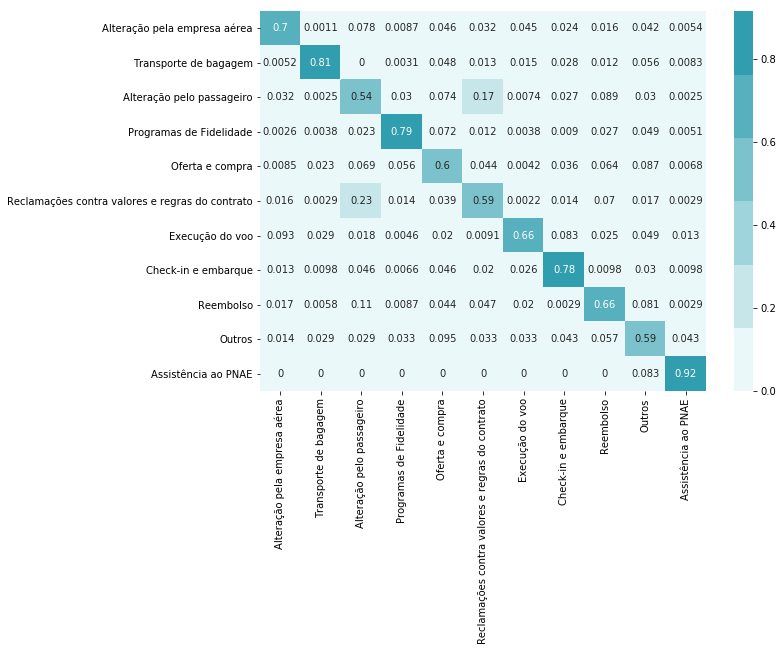

In [46]:
import seaborn as sn
import matplotlib.pyplot as plt
array = confusion_matrix(result, y_test, labels=train['TEMA'].unique())
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis] #normalização dos valores 
df_cm = pd.DataFrame(array, index = train['TEMA'].unique(), #cria um data frame para base ao gráfico
                  columns = train['TEMA'].unique())
plt.figure(figsize = (10,7)) 
sn.heatmap(df_cm, annot=True, cmap=sn.light_palette((210, 90, 60), input="husl"))

**Usando o modelo criado**

In [36]:
# vamos simular uma requisição de alteração de passagem bem direta e simples para testar o modelo estrapolando dados
word = "alteração da minha passagem"

In [37]:
# aplicamos a formatação
sample = review_to_words(word)
sample

'alteracao passagem'

In [38]:
# o modelo só aceita entrada array ou dataframe, portanto vamos criar uma também para o teste
clean_train_review=[]
clean_train_review.append(review_to_words(word))
clean_train_review

['alteracao passagem']

In [39]:
# aplicamos a tokenização do texto teste
sample_final=vectorizer.transform(clean_train_review)
# aplicamos array numpy
sample_final=sample_final.toarray()
sample_final

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
# aplicar o predicit no modelo
result2 = forest.predict(sample_final)
print (result2, word)

['Alteração pelo passageiro'] alteração da minha passagem


In [41]:
# função para aplicar as transformações e realizar as predições
def predict_coment(word):
    to_array=[]
    to_array.append(review_to_words(word))
    sample_final=vectorizer.transform(to_array)
    sample_final=sample_final.toarray()
    result = forest.predict(sample_final)    
    return result, word

In [42]:
test = "Solicito informações /esclarecimentos e/ou soluções sobre a postura negligente e imparcial da Cia aérea Avianca Brasil, em relação a omissão de informação e responsabilidade pela minha estadia e alimentação em razão aos atrasos/cancelamentos do voos da companhia aérea, gerando prejuízos financeiros, danos morais e transtornos emocionais não havendo planejamento preventivo para evitar problemas ao consumidor. Desta forma, a própria Cia aérea Avianca Brasil alegou não arcar com os danos causados e que os passageiros afetados procurassem os seus direitos e reembolso para eventuais custos extras, se eximindo também da responsabilidade de realocação em outras cias aéreas parceiras."

https://www.reclameaqui.com.br/avianca/mudanca-de-voo_vlZ7CurlvKdOWkq-/

In [43]:
predict_coment(test)

(array(['Execução do voo'], dtype=object),
 'Solicito informações /esclarecimentos e/ou soluções sobre a postura negligente e imparcial da Cia aérea Avianca Brasil, em relação a omissão de informação e responsabilidade pela minha estadia e alimentação em razão aos atrasos/cancelamentos do voos da companhia aérea, gerando prejuízos financeiros, danos morais e transtornos emocionais não havendo planejamento preventivo para evitar problemas ao consumidor. Desta forma, a própria Cia aérea Avianca Brasil alegou não arcar com os danos causados e que os passageiros afetados procurassem os seus direitos e reembolso para eventuais custos extras, se eximindo também da responsabilidade de realocação em outras cias aéreas parceiras.')

In [44]:
test2 = "Realizei a compra de um pacote da Decolar em 01/08/2018 para viagem em 20/06/2019 (Ou seja) quase 01 ano. Escolhemos os horários para ficar tranquilos quanto a estadia no destino e conexões. Porém chega a Gol em 24/04/2019 e coloca minha chega no local de minha conexão no horário que o Vôo irá sair do Galeão para Buenos Aires. Acredito que até o presente momento não existe a possibilidade de tele transporte entre aeronaves. Liguei para o atendimento, protocolo 190425012943 no qual a atendente pediu para aguardar e também já ir olhando na grade outros horários, se escolhi o horário matutino é porque não posso chegar em meu destino a noite. Solicito atenção ao caso pois chega ser insano eu ter que alinhar algo tão nítido. Horário de chegada no mesmo horário de conexão."

https://www.reclameaqui.com.br/gol/alteracao-de-voo_jc9uUzpM6SbHyesa/

In [45]:
predict_coment(test2)

(array(['Alteração pela empresa aérea'], dtype=object),
 'Realizei a compra de um pacote da Decolar em 01/08/2018 para viagem em 20/06/2019 (Ou seja) quase 01 ano. Escolhemos os horários para ficar tranquilos quanto a estadia no destino e conexões. Porém chega a Gol em 24/04/2019 e coloca minha chega no local de minha conexão no horário que o Vôo irá sair do Galeão para Buenos Aires. Acredito que até o presente momento não existe a possibilidade de tele transporte entre aeronaves. Liguei para o atendimento, protocolo 190425012943 no qual a atendente pediu para aguardar e também já ir olhando na grade outros horários, se escolhi o horário matutino é porque não posso chegar em meu destino a noite. Solicito atenção ao caso pois chega ser insano eu ter que alinhar algo tão nítido. Horário de chegada no mesmo horário de conexão.')